In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV
import os
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

## データ読み込み

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submit = pd.read_csv('sample_submit.csv')

## train.csvデータの基本統計量を確認

In [7]:
df_train.describe()

,gameId,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,blueWins
count,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4983.683000,0.513000,6.029750,5.92350,5.881875,0.538625,0.358125,17154.067750,17983.514000,0.491750
std,2893.028418,0.499862,2.623876,2.64892,3.189897,0.629728,0.479479,1820.796171,772.348402,0.499963
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,13475.000000,16650.000000,0.000000
25%,2473.750000,0.000000,4.000000,4.00000,3.000000,0.000000,0.000000,16544.000000,17256.000000,0.000000
50%,4985.500000,1.000000,6.000000,6.00000,6.000000,0.000000,0.000000,17409.000000,18021.000000,0.000000
75%,7493.250000,1.000000,8.000000,8.00000,8.000000,1.000000,1.000000,18274.000000,18472.000000,1.000000
max,9998.000000,1.000000,14.000000,14.00000,17.000000,2.000000,1.000000,20619.000000,20101.000000,1.000000


## test.csvデータの基本統計量を確認

In [8]:
df_test.describe()

,gameId,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5062.768000,0.523500,6.208000,5.882500,6.17300,0.543500,0.359500,17178.094000,18003.009000
std,2862.077838,0.499572,2.659186,2.650888,3.26809,0.615871,0.479974,1840.928324,768.510754
min,9.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,13475.000000,16650.000000
25%,2603.500000,0.000000,4.000000,4.000000,4.00000,0.000000,0.000000,16961.000000,17256.000000
50%,5075.500000,1.000000,6.000000,6.000000,6.00000,0.000000,0.000000,17409.000000,18021.000000
75%,7543.250000,1.000000,8.000000,8.000000,8.00000,1.000000,1.000000,18274.000000,18472.000000
max,9999.000000,1.000000,13.000000,14.000000,14.00000,2.000000,1.000000,20619.000000,20101.000000


## train.csvのデータ要約を確認

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   gameId               8000 non-null   int64
 1   blueFirstBlood       8000 non-null   int64
 2   blueKills            8000 non-null   int64
 3   blueDeaths           8000 non-null   int64
 4   blueAssists          8000 non-null   int64
 5   blueEliteMonsters    8000 non-null   int64
 6   blueDragons          8000 non-null   int64
 7   blueTotalGold        8000 non-null   int64
 8   blueTotalExperience  8000 non-null   int64
 9   blueWins             8000 non-null   int64
dtypes: int64(10)
memory usage: 625.1 KB


##### ※全てint型でobject型はなかった

## test.csvのデータ要約を確認

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   gameId               2000 non-null   int64
 1   blueFirstBlood       2000 non-null   int64
 2   blueKills            2000 non-null   int64
 3   blueDeaths           2000 non-null   int64
 4   blueAssists          2000 non-null   int64
 5   blueEliteMonsters    2000 non-null   int64
 6   blueDragons          2000 non-null   int64
 7   blueTotalGold        2000 non-null   int64
 8   blueTotalExperience  2000 non-null   int64
dtypes: int64(9)
memory usage: 140.8 KB


##### ※testデータもtrainデータと同様に全てint型であった

## 欠損値データがあるか確認

In [15]:
df_train.isnull().sum(), df_test.isnull().sum()

(gameId                 0
 blueFirstBlood         0
 blueKills              0
 blueDeaths             0
 blueAssists            0
 blueEliteMonsters      0
 blueDragons            0
 blueTotalGold          0
 blueTotalExperience    0
 blueWins               0
 dtype: int64,
 gameId                 0
 blueFirstBlood         0
 blueKills              0
 blueDeaths             0
 blueAssists            0
 blueEliteMonsters      0
 blueDragons            0
 blueTotalGold          0
 blueTotalExperience    0
 dtype: int64)

##### ※trainデータ、testデータどちらもnullがなかった為、欠損値はなかった

## trainデータの各項目の相関関係を確認

<AxesSubplot:>

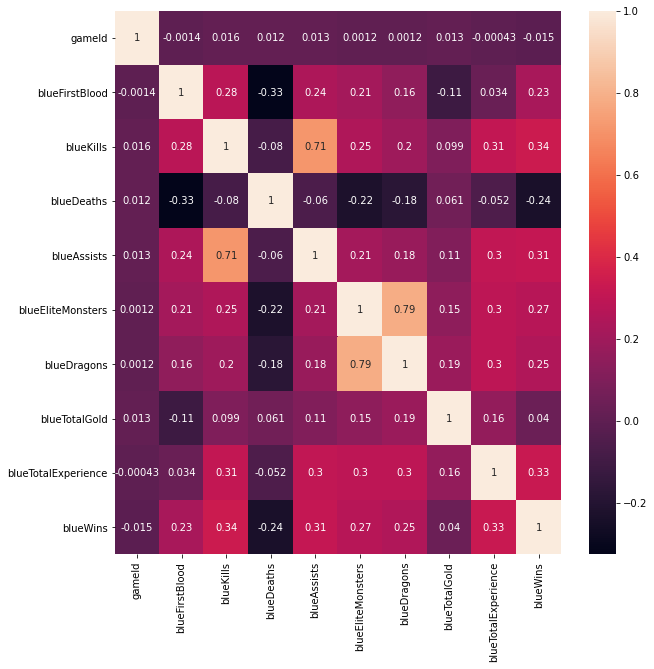

In [17]:
corr=(df_train.corr())
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

##### 「blueAssistsとblueKills」及び「blueDragonsとblueEliteMonsters」に強い正の相関関係があった

## データの前処理

#### blueAssistsとblueKillsに強い相関関係があったため、足し合わせてみる

In [19]:
df_train['blue_kill_assist'] = df_train['blueKills'] + df_train['blueAssists']
df_test['blue_kill_assist'] = df_test['blueKills'] + df_test['blueAssists']

#### blueTotalGoldとblueTotalExperienceがbluewinに関連しているようであり、数値が大きい為、1,000で割る

In [20]:
df_train['Gold_ret'] = (df_train["blueTotalGold"]//1000+1).astype(int)
df_train['Experience_ret'] = (df_train["blueTotalExperience"]//1000+1).astype(int)

df_test['Gold_ret'] = (df_test["blueTotalGold"]//1000+1).astype(int)
df_test['Experience_ret'] = (df_test["blueTotalExperience"]//1000+1).astype(int)

In [24]:
df_train['blueTotalExperience'].describe()

count     8000.000000
mean     17983.514000
std        772.348402
min      16650.000000
25%      17256.000000
50%      18021.000000
75%      18472.000000
max      20101.000000
Name: blueTotalExperience, dtype: float64

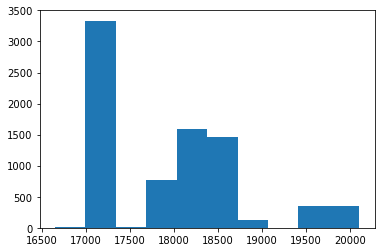

In [23]:
plt.hist(df_train['blueTotalExperience'])
plt.show()

##### blueTotalExperienceの17000以下の数値と20100の数値の割合が少なかった為、削除する

In [25]:
df_train = df_train[(df_train['blueTotalExperience'] >= 17000) & (df_train['blueTotalExperience'] <= 20100)]

In [27]:
df_train['blueAssists'].describe()

count    7987.000000
mean        5.882559
std         3.190540
min         0.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        17.000000
Name: blueAssists, dtype: float64

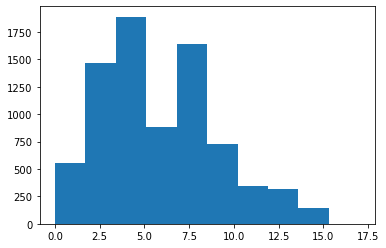

In [26]:
plt.hist(df_train['blueAssists'])
plt.show()

#### blueAssistsの値で17の割合が少なかった為、削除する

In [28]:
df_train = df_train[df_train['blueAssists'] < 17]

#### blueTotalGoldとblueTotalExperienceの関連性があった為、四則演算を加えてみる

In [31]:
df_train['TotalGold/TotalExperience'] = df_train['blueTotalGold'] / df_train['blueTotalExperience']
df_test['TotalGold/TotalExperience'] = df_test['blueTotalGold'] / df_test['blueTotalExperience']
df_train['TotalExperience/TotalGold'] = df_train['blueTotalExperience'] / df_train['blueTotalGold']
df_test['TotalExperience/TotalGold'] = df_test['blueTotalExperience'] / df_test['blueTotalGold']

#### blueEliteMonstersとblueFirstBloodをダミー変数化する

In [32]:
df_train = pd.get_dummies(df_train, columns=['blueEliteMonsters'])
df_train = pd.get_dummies(df_train, columns=['blueFirstBlood'])
df_test = pd.get_dummies(df_test, columns=['blueEliteMonsters'])
df_test = pd.get_dummies(df_test, columns=['blueFirstBlood'])

#### blueTotalExperienceをランク分けで作成してみる

In [34]:
def change_blueTotalExperience(x):
    if x < 17500:
        return 1
    elif 17500 <= x < 19000:
        return 2
    elif 19000 <= x:
        return 3

df_train['change_blueTotalExperience'] = df_train['blueTotalExperience'].apply(change_blueTotalExperience)

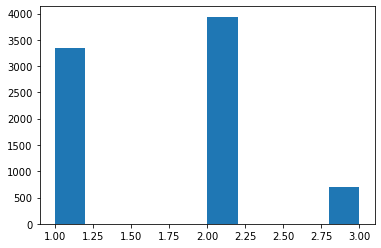

In [35]:
plt.hist(df_train['change_blueTotalExperience'])
plt.show()

In [36]:
def change_blueTotalExperience(x):
    if x < 17500:
        return 1
    elif 17500 <= x < 19000:
        return 2
    elif 19000 <= x:
        return 3

df_test['change_blueTotalExperience'] = df_test['blueTotalExperience'].apply(change_blueTotalExperience)

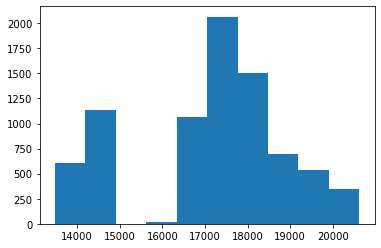

In [38]:
plt.hist(df_train['blueTotalGold'])
plt.show()

#### blueTotalGoldについてもランク分けで作成してみる

In [39]:
def change_blueTotalGold(x):
    if x < 17000:
        return 1
    elif 17000 <= x < 18500:
        return 2
    elif 18500 <= x:
        return 3

df_train['change_blueTotalGold'] = df_train['blueTotalGold'].apply(change_blueTotalGold)

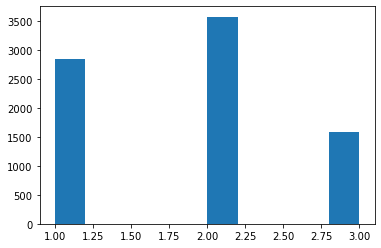

In [40]:
plt.hist(df_train['change_blueTotalGold'])
plt.show()

In [41]:
def change_blueTotalGold(x):
    if x < 17000:
        return 1
    elif 17000 <= x < 18500:
        return 2
    elif 18500 <= x:
        return 3

df_test['change_blueTotalGold'] = df_test['blueTotalGold'].apply(change_blueTotalGold)

#### ダミー変数化する

In [44]:
df_train = pd.get_dummies(df_train, columns=['change_blueTotalExperience'])
df_train = pd.get_dummies(df_train, columns=['change_blueTotalGold'])
df_test = pd.get_dummies(df_test, columns=['change_blueTotalExperience'])
df_test = pd.get_dummies(df_test, columns=['change_blueTotalGold'])

#### 必要なカラムのみ抽出する

In [46]:
select_columns = ['blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueTotalGold', 'blueTotalExperience', 'Gold_ret', 'Experience_ret', 'blue_kill_assist', 'blueEliteMonsters_0', 'blueEliteMonsters_1', 'blueEliteMonsters_2', 'blueFirstBlood_0', 'blueFirstBlood_1', 'TotalGold/TotalExperience', 'TotalExperience/TotalGold', 'change_blueTotalExperience_1', 'change_blueTotalExperience_2', 'change_blueTotalExperience_3', 'change_blueTotalGold_1', 'change_blueTotalGold_2', 'change_blueTotalGold_3']
df_train[select_columns]

,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueTotalExperience,Gold_ret,Experience_ret,blue_kill_assist,blueEliteMonsters_0,...,blueFirstBlood_0,blueFirstBlood_1,TotalGold/TotalExperience,TotalExperience/TotalGold,change_blueTotalExperience_1,change_blueTotalExperience_2,change_blueTotalExperience_3,change_blueTotalGold_1,change_blueTotalGold_2,change_blueTotalGold_3
0,5,8,6,0,14536,17256,15,18,11,1,...,1,0,0.842374,1.187122,1,0,0,1,0,0
1,10,1,5,0,14536,17863,15,18,15,1,...,0,1,0.813749,1.228880,0,1,0,1,0,0
2,3,10,2,0,17409,17256,18,18,5,1,...,1,0,1.008866,0.991211,1,0,0,0,1,0
3,7,10,8,0,19558,18201,20,19,15,1,...,0,1,1.074556,0.930617,0,1,0,0,0,1
4,4,9,4,0,17409,17256,18,18,8,1,...,1,0,1.008866,0.991211,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9,6,14,0,18513,18201,19,19,23,1,...,0,1,1.017142,0.983147,0,1,0,0,0,1
7996,3,10,4,0,17381,19797,18,20,7,1,...,1,0,0.877961,1.139002,0,0,1,0,1,0
7997,9,3,9,1,18274,18491,19,19,18,0,...,0,1,0.988265,1.011875,0,1,0,0,1,0
7998,5,10,6,1,18274,18491,19,19,11,0,...,1,0,0.988265,1.011875,0,1,0,0,1,0


### 標準化を実施する

In [47]:
ss = StandardScaler()
df_train[select_columns] = ss.fit_transform(df_train[select_columns])
df_test[select_columns] = ss.fit_transform(df_test[select_columns])

#### 説明変数をX、目的変数をyとする

In [48]:
X = df_train[select_columns]
y = df_train['blueWins']

#### Xとyを学習データとテストデータに分ける

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

#### RandomizedSearchCV クラスをインポートする

In [51]:
from sklearn.model_selection import RandomizedSearchCV

#### ハイパーパラメータを探索する範囲の指定

In [52]:
param_distributions = {
    'max_depth': list(range(35, 55, 1)),
    'min_samples_split': list(range(20, 40, 1)),
    'min_samples_leaf': list(range(1, 10, 1)),
    'n_estimators': list(range(130, 160, 1)),
}

#### 学習に使用するアルゴリズム

In [55]:
estimator = RandomForestClassifier(random_state=0)

#### 試行回数の指定

In [53]:
n_iter = 200
cv = 5

#### モデルの作成

In [56]:
tuned_model = RandomizedSearchCV(
    estimator=estimator, 
    param_distributions=param_distributions, 
    n_iter=n_iter, cv=cv, 
    random_state=0, return_train_score=False
)

In [57]:
tuned_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=200,
                   param_distributions={'max_depth': [35, 36, 37, 38, 39, 40,
                                                      41, 42, 43, 44, 45, 46,
                                                      47, 48, 49, 50, 51, 52,
                                                      53, 54],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, 31,
                                                              32, 33, 34, 35,
                                                              36, 37, 38, 39],
                                        'n_estimators': 

#### ベストパラメータ確認

In [58]:
best_param = tuned_model.best_params_
best_param

{'n_estimators': 149,
 'min_samples_split': 36,
 'min_samples_leaf': 5,
 'max_depth': 47}

In [59]:
best_model = tuned_model.best_estimator_

#### 精度確認

In [60]:
best_model.score(X_train, y_train), best_model.score(X_test, y_test)

(0.8173410404624277, 0.7829041487839771)

#### ベストモデル作成

In [61]:
forest = RandomForestClassifier(random_state=0, **best_param).fit(X_train, y_train)

#### 混同行列表示

In [62]:
from sklearn.metrics import confusion_matrix
Y_pred_rf = forest.predict(X_test)
confusion_matrix(y_test, Y_pred_rf)

array([[1114,  317],
       [ 290, 1075]])

#### 重要度表示

Important features
____________________________________________________________
81.73


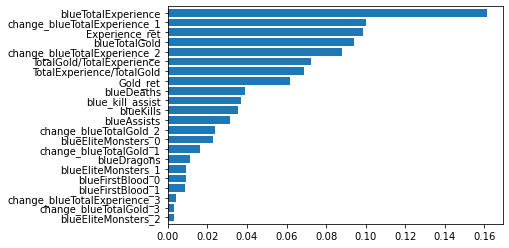

In [63]:
acc_random_forest = round(forest.score(X_train, y_train) * 100, 2)

print("Important features")
pd.Series(forest.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)